In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


In [28]:
stocks = input("Enter the code of the stock:- ")
data=yf.download(stocks,"2008-01-01","2021-01-18",auto_adjust=True)
data.head()

Enter the code of the stock:-  GC=F


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [29]:
data.shape

(3281, 5)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3281 non-null   float64
 1   High    3281 non-null   float64
 2   Low     3281 non-null   float64
 3   Close   3281 non-null   float64
 4   Volume  3281 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [31]:
data.describe()

,Open,High,Low,Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


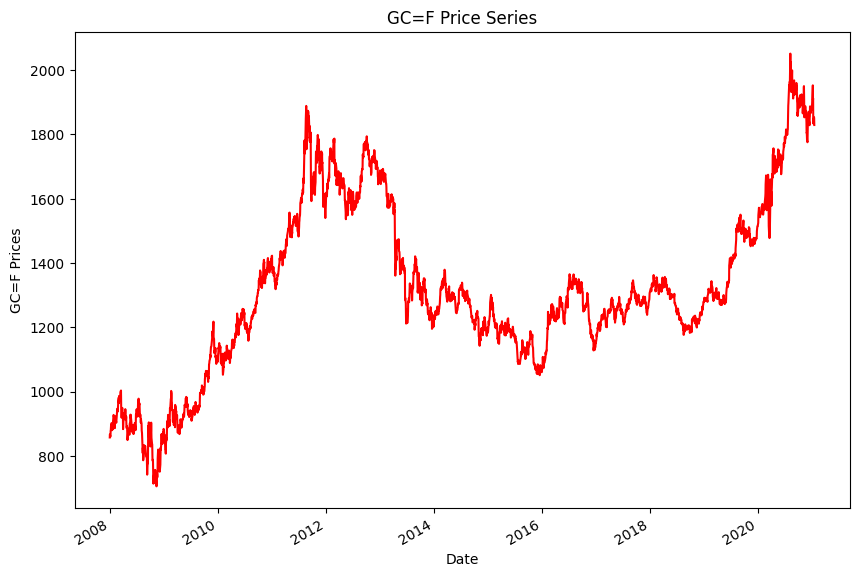

In [32]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

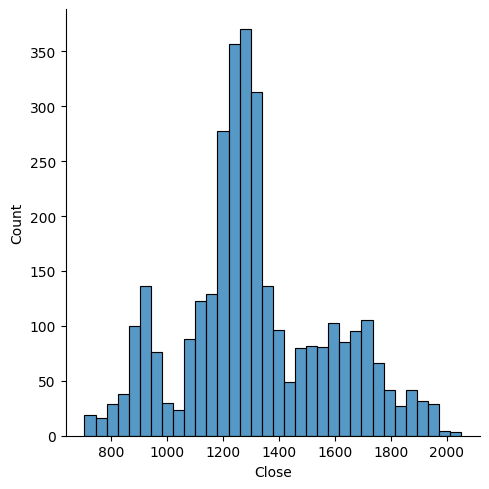

In [33]:
sns.displot(data["Close"])

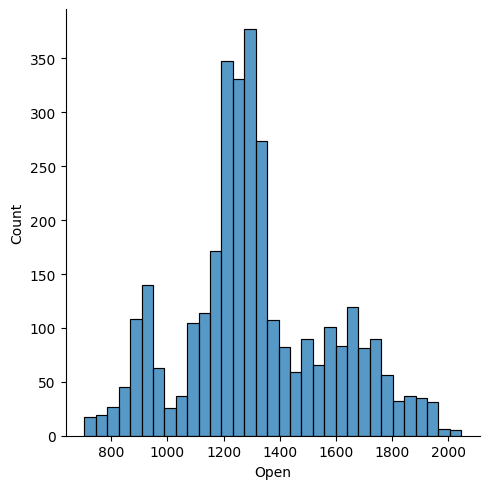

In [34]:
sns.displot(data["Open"])

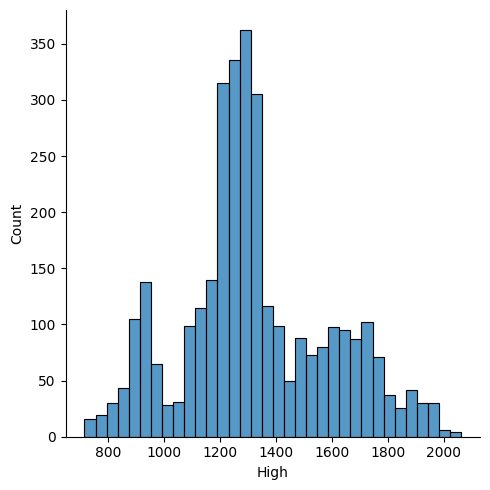

In [35]:
sns.displot(data["High"])

In [46]:
# Conclusions

# - Shape of the data
# - How our data is distributed
# - Its very non lineaer

# Linear, Logis, Regurlarized, SVM

# test_size = 0.2 20% of the data

X = data.drop("Close",axis=1)
y=data['Close']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2624, 4)
(657, 4)
(2624,)
(657,)


# Model Evaluation

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)

In [48]:
pred1

array([1729.403858  , 1084.16216965, 1268.19696234, 1107.60214208,
       1363.92206279,  902.38354996, 1247.65551237, 1287.92027955,
       1208.40577078, 1902.49597207, 1153.19432398, 1946.34793786,
       1575.54863898, 1219.13543342,  955.61801284, 1719.02138421,
       1372.17522077, 1320.15998277,  935.38437585, 1331.51948224,
       1313.06078563, 1325.52847556, 1156.14406558, 1063.10704374,
       1214.94354412, 1649.74996966, 1198.52526174, 1888.91001257,
       1648.29309772, 1285.75848039, 1397.46720727, 1277.20063228,
        867.33410365, 1610.63042607, 1343.04773268, 1346.85553084,
       1307.02595286, 1071.02561811, 1228.97435669, 1164.5305458 ,
       1368.1378064 , 1182.62892173, 1285.80130391, 1489.92350262,
       1266.40870641, 1295.29416968, 1225.49620593, 1179.09757418,
       1824.62377969, 1261.46267691, 1377.34497574, 1351.76951787,
       1327.91471954, 1661.33117039, 1644.59897838, 1306.14496395,
       1107.55421461, 1243.578508  , 1281.50120961,  897.89284

In [49]:
# Mean Square error ---> MSE
#Root Mean Square error ----> sqrt(MSE)
from sklearn.metrics import mean_squared_error , r2_score
'''
   y_test:- ground truth
   y_pred:- model predict 
   
'''
def calculate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    
    print("MSE-",mse)
    print("RMSE-",rmse)
    print("R2_Score-",r2_scores)
    
calculate_metrics(y_test,pred1)

MSE- 27.472312298993653
RMSE- 5.241403657322498
R2_Score- 0.9995883344184746


In [50]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e+04, tolerance: 1.826e+04
  model = cd_fast.enet_coordinate_descent(


In [51]:
calculate_metrics(y_test, la_p)

MSE- 46.190175348279055
RMSE- 6.796335435238541
R2_Score- 0.9993078520224814


In [52]:
calculate_metrics(y_test, ri_p)

MSE- 27.472342705435747
RMSE- 5.241406557922763
R2_Score- 0.9995883339628419


In [53]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.028 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.019 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.028 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.009 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.019 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test)

In [55]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")